## 1 - SetUp Environment

In [1]:
import numpy as np
import pandas as pd
import pickle

<hr>

## 2 - Load Targets and Features

In [2]:
with open('../Assets/Version 4-3-encoded.pickle', 'rb') as file:
    df = pickle.load(file)

<hr>

## 3 - Install PyCaret

In [4]:
from pycaret.classification import 

<hr>

## 4 - Set up Classifier

In [11]:
#define numerical features
num_features = ['Age', 'Parch' , 'Fare']

#define categorical features
cat_features = [col for col in df.columns if col not in num_features]

if 'Survived' in cat_features:
    cat_features.remove('Survived')

In [15]:
clf = setup(
    df,
    target = 'Survived',
    train_size = 0.8,
    
    numeric_features = num_features,
    categorical_features = cat_features,
    
    normalize = True,
    normalize_method = 'zscore',
    feature_selection_method = 'univariate',

    session_id = 42
)

,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1306, 14)"
4,Transformed data shape,"(1306, 14)"
5,Transformed train set shape,"(1044, 14)"
6,Transformed test set shape,"(262, 14)"
7,Ordinal features,10
8,Numeric features,3
9,Categorical features,10


<hr>

## 5 - Train Model

In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8583,0.8980,0.8094,0.8181,0.8113,0.6981,0.7005,0.4320
ridge,Ridge Classifier,0.8554,0.0000,0.7812,0.8284,0.8020,0.6885,0.6913,0.3410
lda,Linear Discriminant Analysis,0.8554,0.8914,0.7812,0.8284,0.8020,0.6885,0.6913,0.2690
lightgbm,Light Gradient Boosting Machine,0.8525,0.8969,0.7839,0.8205,0.7993,0.6832,0.6859,0.5580
lr,Logistic Regression,0.8497,0.8927,0.7786,0.8192,0.7958,0.6772,0.6803,1.3460
ada,Ada Boost Classifier,0.8449,0.8829,0.7863,0.8022,0.7927,0.6689,0.6706,0.3330
knn,K Neighbors Classifier,0.8296,0.8724,0.7635,0.7804,0.7698,0.6348,0.6368,0.8700
rf,Random Forest Classifier,0.8295,0.8907,0.7737,0.7781,0.7732,0.6370,0.6396,0.5160
et,Extra Trees Classifier,0.8257,0.8673,0.7584,0.7820,0.7656,0.6274,0.6317,0.3960
svm,SVM - Linear Kernel,0.8046,0.0000,0.7301,0.7475,0.7357,0.5812,0.5840,0.2870


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<hr>

## 6 - Analyse the Basic Model

<b><u>Accuracy</u></b> </br>
<i> A highest accuracy of 0.8583 obtained from a Gradient Boosting Classifier model in PyCaret means that the model was able to correctly classify approximately 85.83% of the samples in the train set, based on the input features provide </i>

<b><u>AUC</u></b> </br>
<i> AUC of 0.8980 indicates that the model is able to discriminate between positive and negative samples with relatively high accuracy. </i>

<b><u>Recall</u></b> </br>
<i>among all values that are predicted survived, %80.94 of values are predicited as survived and they are actually survived, but 19.06% of values are predicted as dead whereas they are actually survived. </i>

<b><u>Precision</u></b> </br>
<i>among all values that are predicted survived, %82.84 of values are predicited as survived and they are actually survived, but 17.16% of values are predicted as survived whereas they are actually dead. </i>

Now we should make a decision:
* if False Negative is costly and we want to reduce it, we should focus on hight **recall**. False Negative means the actual value is positive (good or survived), but model predict negative (bad or dead).

* if False Positive is costly and we want to reduce it, we should focus on hight **precision**. False Positive means the actual value is negative (bad or dead), but model predict positive (good or survived).

* if we have imbalanced target somehow the number of negative is more than positive, we should focus on **AUC**.

<hr>

## 7 - Choose Models

During the EDA, we see the model is imbalanced and the negative rate (0) is more than being survived (1). so AUC is one of our factor. Further more, it is very important for us to model reduce wrong the number of predicitons in which say passengers will be survived, but they wouldn't. It means we want to reduce False positive, and precision is important as well.

Thus for all model, just choose top-3 models:
* Gradient Boosting Classifier (gbc)
* Light Gradient Boosting Machine (lightgbm)
* Linear Discriminant Analysis (lda)

In [37]:
gbc = create_model('gbc', verbose=False)
lightgbm = create_model('lightgbm', verbose=False)
lda = create_model('lda', verbose=False)

top3_models = [gbc, lightgbm, lda]

<hr>

## 8 - Tune Models

In [43]:
#Gradient Boosting Classifier
tuned_gbc = tune_model(
        gbc,
        n_iter = 10,
        optimize = 'F1',
        choose_better = True,
        early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8381,0.8792,0.8250,0.7674,0.7952,0.6616,0.6628
1,0.8381,0.9323,0.8500,0.7556,0.8000,0.6648,0.6680
2,0.8571,0.8744,0.7000,0.9032,0.7887,0.6834,0.6961
3,0.8095,0.8409,0.7179,0.7568,0.7368,0.5878,0.5883
4,0.8654,0.9199,0.8205,0.8205,0.8205,0.7128,0.7128
5,0.8750,0.9144,0.8718,0.8095,0.8395,0.7374,0.7387
6,0.8365,0.8961,0.8205,0.7619,0.7901,0.6566,0.6578
7,0.9231,0.9720,0.8462,0.9429,0.8919,0.8325,0.8354
8,0.8365,0.8773,0.7436,0.8056,0.7733,0.6458,0.6471


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
#Light Gradient Boosting Machine
tuned_lightgbm = tune_model(
        lightgbm,
        n_iter = 10,
        optimize = 'F1',
        choose_better = True,
        early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8476,0.8765,0.8750,0.7609,0.8140,0.6860,0.6908
1,0.8476,0.9437,0.8500,0.7727,0.8095,0.6830,0.6852
2,0.8286,0.8679,0.6750,0.8438,0.7500,0.6220,0.6310
3,0.8476,0.8477,0.7692,0.8108,0.7895,0.6702,0.6708
4,0.8462,0.9140,0.7436,0.8286,0.7838,0.6649,0.6673
5,0.8846,0.9178,0.8718,0.8293,0.8500,0.7563,0.7570
6,0.8365,0.9136,0.8205,0.7619,0.7901,0.6566,0.6578
7,0.9327,0.9815,0.8718,0.9444,0.9067,0.8542,0.8558
8,0.8077,0.8665,0.6667,0.7879,0.7222,0.5767,0.5814


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
#Linear Discriminant Analysis
tuned_lda = tune_model(
        lda,
        n_iter = 10,
        optimize = 'F1',
        choose_better = True,
        early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8381,0.8604,0.8000,0.7805,0.7901,0.6584,0.6585
1,0.8571,0.9131,0.8500,0.7907,0.8193,0.7014,0.7027
2,0.8476,0.8621,0.6750,0.9000,0.7714,0.6606,0.6760
3,0.8095,0.8312,0.6923,0.7714,0.7297,0.5833,0.5854
4,0.8654,0.9120,0.8462,0.8049,0.8250,0.7157,0.7163
5,0.8750,0.9187,0.8205,0.8421,0.8312,0.7320,0.7321
6,0.8365,0.8779,0.7949,0.7750,0.7848,0.6531,0.6532
7,0.9135,0.9637,0.8462,0.9167,0.8800,0.8125,0.8141
8,0.8462,0.8631,0.7179,0.8485,0.7778,0.6614,0.6668


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


<hr>

## 9 - Ensembel Model

now we should create a model in which there is combination of the above models:

In [46]:
ensemble = blend_models(
    estimator_list = [tuned_gbc, tuned_lightgbm, tuned_lda], 
    choose_better = True, 
    optimize = "F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8381,0.8769,0.8250,0.7674,0.7952,0.6616,0.6628
1,0.8381,0.9423,0.8500,0.7556,0.8000,0.6648,0.6680
2,0.8476,0.8737,0.6750,0.9000,0.7714,0.6606,0.6760
3,0.8286,0.8448,0.7179,0.8000,0.7568,0.6250,0.6272
4,0.8558,0.9203,0.7949,0.8158,0.8052,0.6907,0.6909
5,0.8750,0.9254,0.8462,0.8250,0.8354,0.7347,0.7348
6,0.8365,0.9055,0.7949,0.7750,0.7848,0.6531,0.6532
7,0.9231,0.9838,0.8462,0.9429,0.8919,0.8325,0.8354
8,0.8462,0.8675,0.7436,0.8286,0.7838,0.6649,0.6673


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


The most important factor in this problem is F1. so it means, the best model is <b>tunned "Gradient Boosting Classifier"</b>

<hr>

## 10 - Prediction on Test Data

In [60]:
prediction = predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8359,0.8828,0.7879,0.7800,0.7839,0.6516,0.6516


In [61]:
prediction

,Age,Parch,Fare,female,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,"Cabin G,T",C:Cherbourg,Q:Queenstown,Survived,prediction_label,prediction_score
1049,42.0,0,26.549999,0,0,0,0,1,0,0,0,0,0,0,1,0.6659
1229,25.0,0,31.500000,0,0,0,0,0,0,0,0,0,0,0,0,0.8444
1133,45.0,1,134.500000,0,0,0,0,0,1,0,0,1,0,0,0,0.9172
1127,64.0,0,75.250000,0,0,0,0,1,0,0,0,1,0,0,0,0.5793
293,24.0,0,8.850000,1,0,0,0,0,0,0,0,0,0,0,1,0.7091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,28.0,0,8.050000,1,0,0,0,0,0,0,0,0,0,0,1,0.6983
913,28.0,0,31.683300,1,0,0,0,0,0,0,0,0,0,1,1,0.7989
931,39.0,1,13.416700,0,0,0,0,0,0,0,0,1,0,0,0,0.9400
442,25.0,0,7.775000,0,0,0,0,0,0,0,0,0,0,0,0,0.9347


<hr>

## 10 - Draw Plots

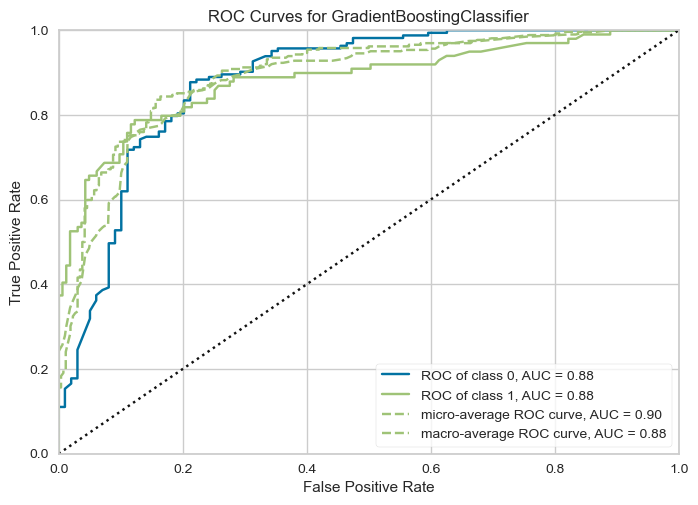

In [47]:
plot_model(tuned_gbc, plot='auc')

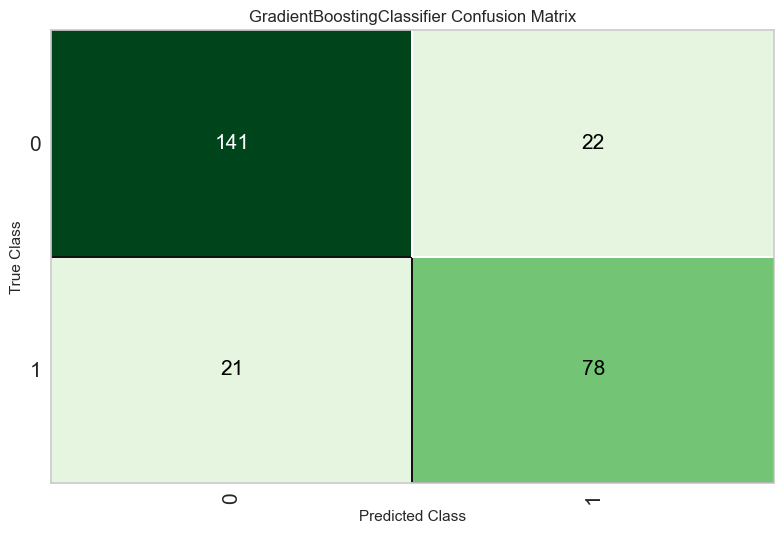

In [48]:
plot_model(tuned_gbc, plot='confusion_matrix')